
Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.
Flow of Autoencoder

Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image


***Import Modules***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

**Load the Dataset**

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)      # batch_size, height, width, channels
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

**Add Noise to the Image**

In [5]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

**Exploratory Data Analysis**

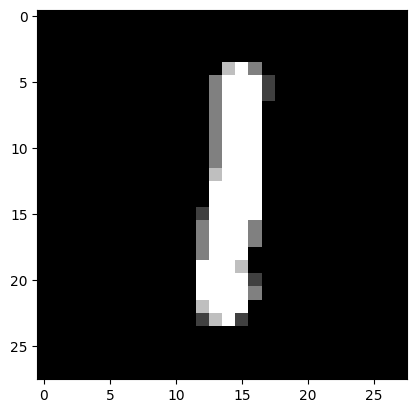

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

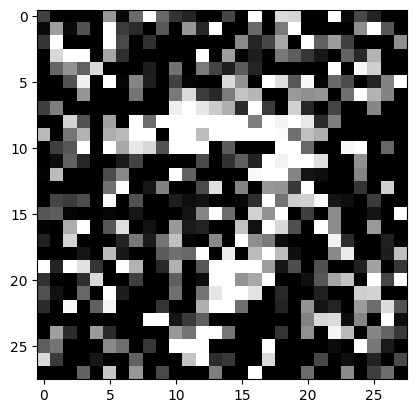

In [8]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

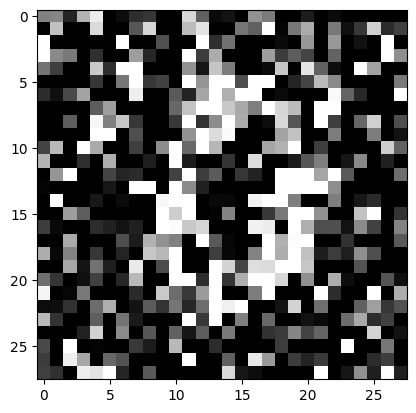

In [9]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

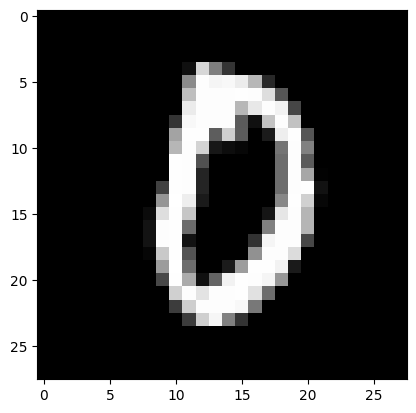

In [10]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

**Model Creation**

In [11]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),     # An upsampling layer that doubles the dimensions of the previous layer.
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

**train the model**

In [12]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 149s 626ms/step - loss: 0.2555 - val_loss: 0.1592
Epoch 2/20
235/235 [==============================] - 141s 598ms/step - loss: 0.1484 - val_loss: 0.1403
Epoch 3/20
235/235 [==============================] - 136s 578ms/step - loss: 0.1384 - val_loss: 0.1339
Epoch 4/20
235/235 [==============================] - 143s 608ms/step - loss: 0.1330 - val_loss: 0.1290
Epoch 5/20
235/235 [==============================] - 138s 588ms/step - loss: 0.1288 - val_loss: 0.1259
Epoch 6/20
235/235 [==============================] - 137s 585ms/step - loss: 0.1261 - val_loss: 0.1236
Epoch 7/20
235/235 [==============================] - 140s 597ms/step - loss: 0.1242 - val_loss: 0.1223
Epoch 8/20
235/235 [==============================] - 137s 585ms/step - loss: 0.1227 - val_loss: 0.1208
Epoch 9/20
235/235 [==============================] - 145s 617ms/step - loss: 0.1215 - val_loss: 0.1198
Epoch 10/20
235/235 [==============================] - 137s 584m

**Visualize the Results**

Epoch 1/20
235/235 [==============================] - 142s 605ms/step - loss: 0.1149 - val_loss: 0.1146
Epoch 2/20
235/235 [==============================] - 144s 611ms/step - loss: 0.1145 - val_loss: 0.1135
Epoch 3/20
235/235 [==============================] - 141s 598ms/step - loss: 0.1141 - val_loss: 0.1130
Epoch 4/20
235/235 [==============================] - 143s 605ms/step - loss: 0.1139 - val_loss: 0.1127
Epoch 5/20
235/235 [==============================] - 143s 607ms/step - loss: 0.1136 - val_loss: 0.1132
Epoch 6/20
235/235 [==============================] - 141s 599ms/step - loss: 0.1134 - val_loss: 0.1124
Epoch 7/20
235/235 [==============================] - 142s 603ms/step - loss: 0.1131 - val_loss: 0.1119
Epoch 8/20
235/235 [==============================] - 140s 598ms/step - loss: 0.1129 - val_loss: 0.1119
Epoch 9/20
235/235 [==============================] - 139s 591ms/step - loss: 0.1128 - val_loss: 0.1121
Epoch 10/20
235/235 [==============================] - 141s 602m

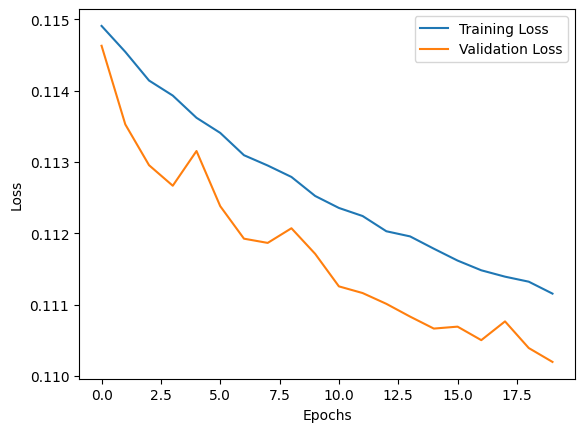

313/313 [==============================] - 6s 19ms/step
Reconstruction Precision: 0.9541


In [14]:
# Train the model and capture training history
history = model.fit(
    x_train_noisy, x_train, epochs=20, batch_size=256,
    validation_data=(x_test_noisy, x_test)
)

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate precision (reconstruction accuracy) on test data
x_test_reconstructed = model.predict(x_test_noisy)
precision = np.mean(1 - np.abs(x_test - x_test_reconstructed))
print(f'Reconstruction Precision: {precision:.4f}')

In [15]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 [==============================] - 9s 30ms/step


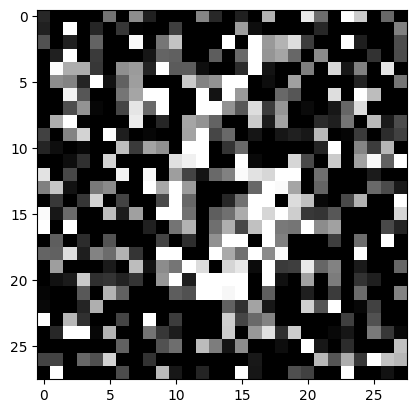

In [16]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

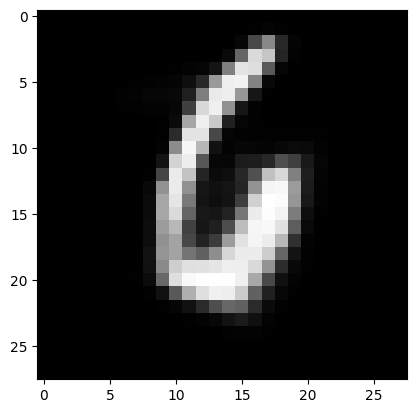

In [17]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

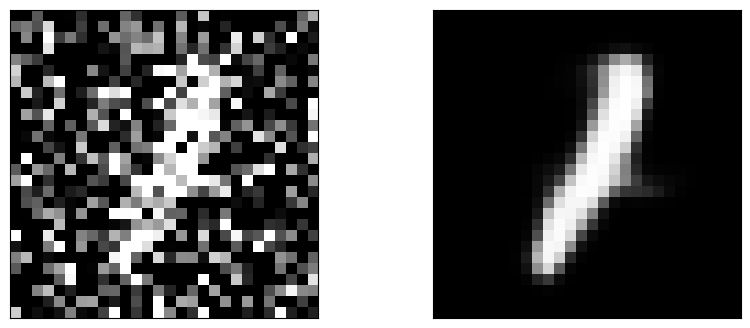

In [18]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

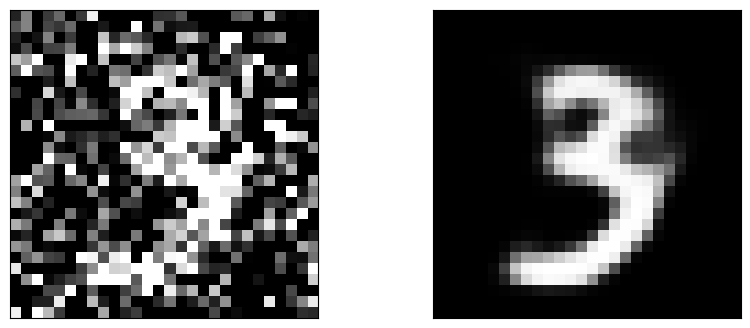

In [19]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()